In [2]:
import nibabel as nb
import numpy as np
from nilearn import plotting
import os
import ants


In [19]:
subject = 'test_subject'

os.environ['SUBJECTS_DIR'] = '/home/lauri/Documents/SVT1/SUBJECTS_DIR'

wmparc_file = f'{os.environ["SUBJECTS_DIR"]}/{subject}/mri/wmparc.mgz'


In [20]:
# load data & affine
wmparc = nb.load(wmparc_file).get_fdata()
wmparc_affine = nb.load(wmparc_file).affine

# load and cut left 
lh_cs = (wmparc == 5001).astype(int) 
lh_csf = (wmparc == 4).astype(int)

idx = np.where(lh_csf)
cut = np.min(idx[1])
lh_cs[:,cut:,:] = 0


# load and cut right 
rh_cs = (wmparc == 5002).astype(int) 
rh_csf = (wmparc == 43).astype(int)

idx = np.where(rh_csf)
cut = np.min(idx[1])
rh_cs[:,cut:,:] = 0

cs = np.logical_or(lh_cs,rh_cs).astype(int)
cs_img = nb.Nifti1Image(cs.astype(float), wmparc_affine )




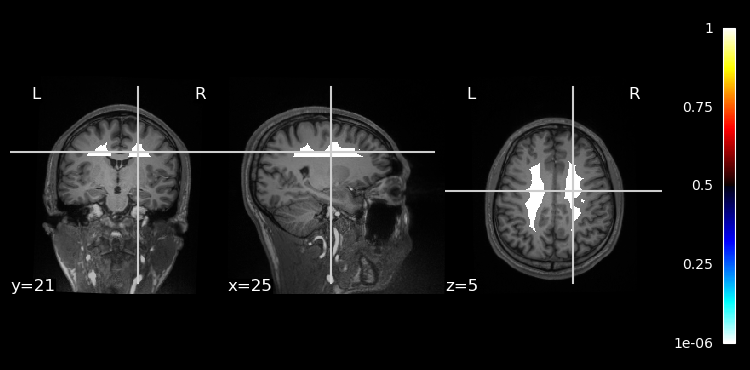

In [24]:
# show the uneroded CS
orig_file = f'{os.environ["SUBJECTS_DIR"]}/{subject}/mri/orig.mgz'
plotting.plot_stat_map(
    cs_img,
    bg_img=orig_file
);

In [22]:
# save, load, erode, save # alternative is ants.from_numpy() but converting the affine is pain. 
cs_file = f'{os.environ["SUBJECTS_DIR"]}/{subject}/mri/cs.nii.gz'
nb.save(cs_img, cs_file)

cs_file_eroded = f'{os.environ["SUBJECTS_DIR"]}/{subject}/mri/cs_eroded.nii.gz'
ants_img = ants.image_read(cs_file)
eroded_cs = ants.morphology(ants_img ,operation='erode',radius=2  )
ants.image_write(eroded_cs, cs_file_eroded)


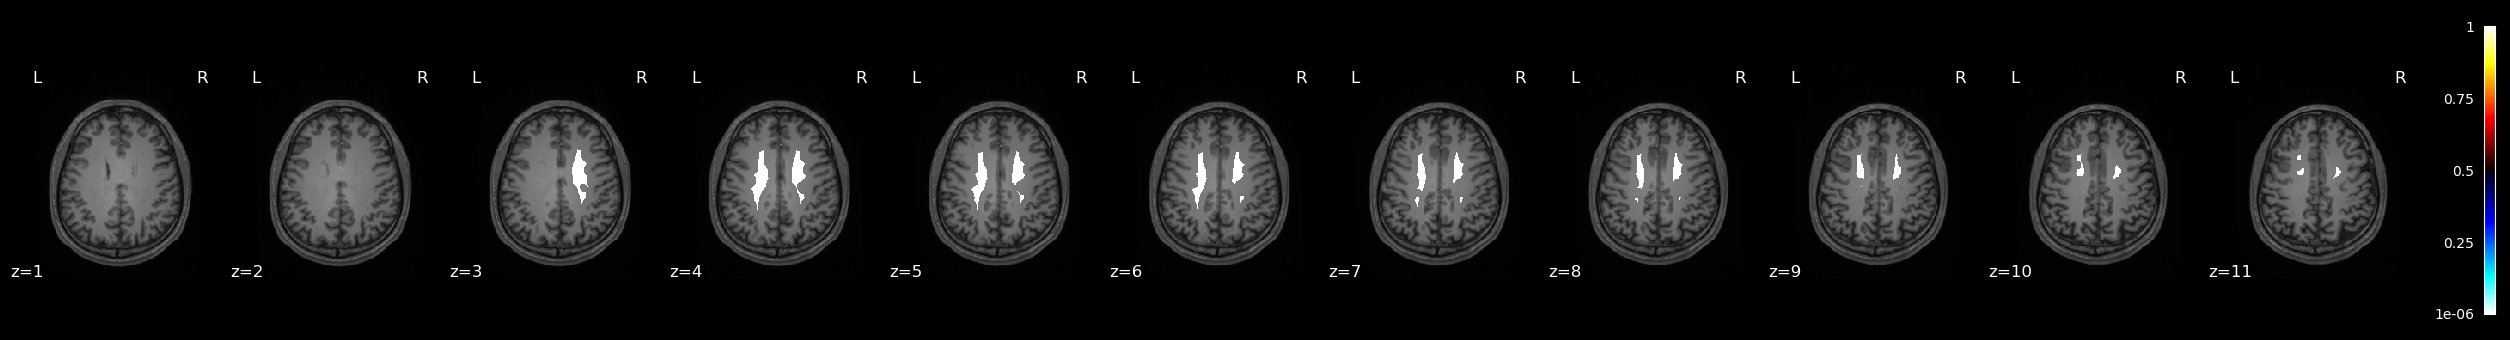

In [40]:
# show the eroded CS
plotting.plot_stat_map(
    cs_file_eroded,
    bg_img=orig_file,
    display_mode = 'z',
    cut_coords = np.arange(1,12,1)
);